In [3]:
!pip install tensorflow 

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/1f/97/dec9dfa95cfbee631adffbeb0b7eda51ddc93a5f7e8aa8f4d95dde59e69e/tensorflow-2.16.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.2 from https://files.pythonhosted.org/packages/46/87/c3e4e9fe7c630f38a6984afdd1d4ed531ef9c74dc66b86f46f6bdd89d608/tensorflow_intel-2.16.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

ModuleNotFoundError: No module named 'matplotlilb'

In [4]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np 

In [8]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step


In [9]:
len(X_train)

60000

In [10]:
len(X_test)

10000

In [11]:
X_train[0].shape

(28, 28)

In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

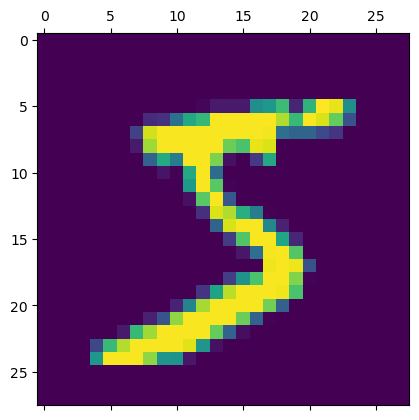

In [13]:
plt.matshow(X_train[0])

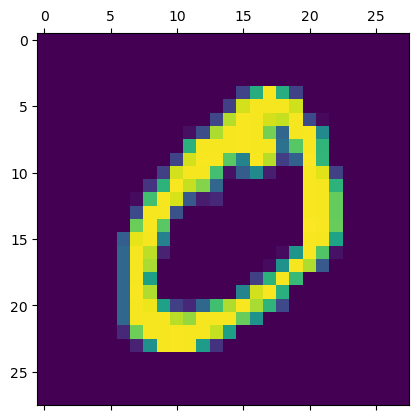

In [15]:
plt.matshow(X_train[1])

In [16]:
y_train[2]

4

In [18]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [21]:
X_train.shape

(60000, 28, 28)

In [43]:
X_train = X_train/255
X_test = X_test/255
#to increase accuracy

In [39]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [40]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [41]:
X_train_flattened[0]  #now its converted from 2d aray to 1d array

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [42]:
model = keras.Sequential([
    # Add a Dense (fully connected) layer with 10 units, input shape of 784, and sigmoid activation function
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Compile the model by specifying the optimizer, loss function, and metrics to track
model.compile(
    # Use the Adam optimizer
    optimizer='adam',
    
     # Use sparse categorical crossentropy as the loss function
    loss='sparse_categorical_crossentropy',
    
     # Track accuracy during training
    metrics=['accuracy']
)

# Train the model on the training data
model.fit(
    # The flattened training data (each image is a 784-dimensional vector)
    X_train_flattened,
    # The corresponding labels for the training data
    y_train,
    # model will iterate 5 times
    epochs=5
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8093 - loss: 0.7323
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9141 - loss: 0.3076
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9202 - loss: 0.2830
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9236 - loss: 0.2725
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9235 - loss: 0.2709


In [44]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9166 - loss: 0.3027


[0.2662944495677948, 0.9266999959945679]

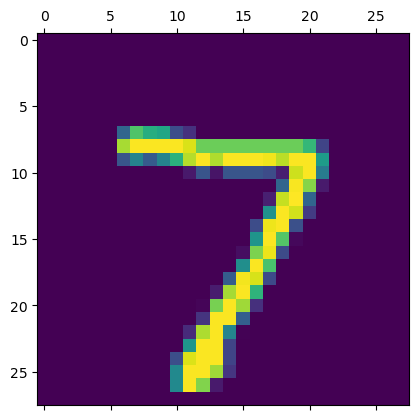

In [50]:
plt.matshow(X_test[0])

In [51]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([1.7836770e-02, 2.4484436e-07, 4.9166575e-02, 9.4230515e-01,
       1.8579989e-03, 1.0408084e-01, 1.1944721e-06, 9.9978352e-01,
       7.9895161e-02, 6.5298700e-01], dtype=float32)

In [53]:
np.argmax(y_predicted[0])

7

In [54]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([3.4353873e-01, 3.3497163e-03, 9.9883848e-01, 3.4063244e-01,
       4.1607609e-10, 8.1590158e-01, 7.8109545e-01, 5.1980821e-13,
       1.2831338e-01, 2.5554685e-09], dtype=float32)

In [55]:
np.argmax(y_predicted[1])

2

In [57]:
y_predicted_labels = [np.argmax(i)for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [58]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [62]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    7,    2,    3,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   4,    9,  926,   18,    7,    3,   13,   10,   37,    5],
       [   2,    0,   19,  929,    0,   18,    2,   11,   19,   10],
       [   1,    1,    2,    2,  904,    0,   12,    4,   10,   46],
       [   9,    1,    4,   43,    9,  766,   16,    7,   30,    7],
       [  12,    3,    6,    1,    7,   12,  912,    2,    3,    0],
       [   1,    5,   24,    6,    5,    0,    0,  954,    3,   30],
       [   6,    6,    6,   20,    9,   23,   10,   12,  873,    9],
       [  10,    5,    1,   10,   13,    6,    0,   22,    8,  934]])>

Text(95.72222222222221, 0.5, 'Truth')

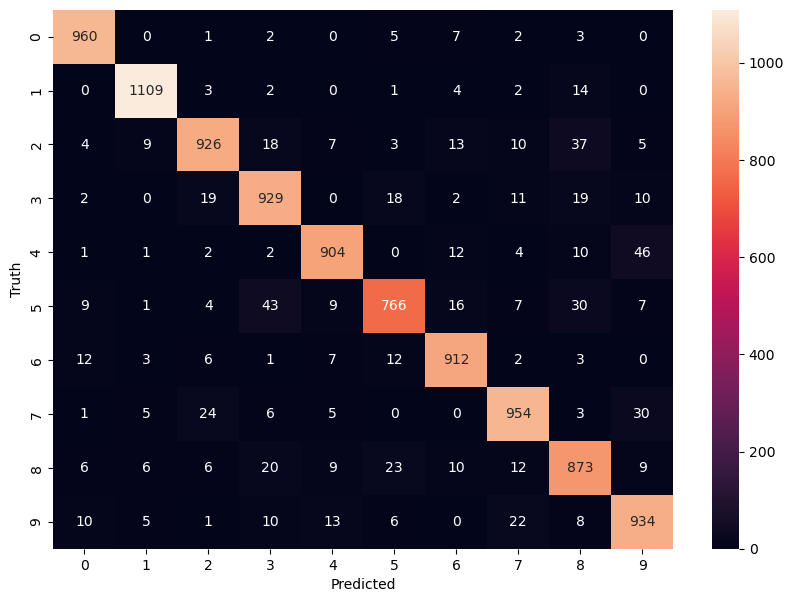

In [65]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [67]:
model = keras.Sequential([
    # Add a Dense (fully connected) layer with 10 units, input shape of 784, and sigmoid activation function
    keras.layers.Dense(10, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    # Use the Adam optimizer
    optimizer='adam',
    
     # Use sparse categorical crossentropy as the loss function
    loss='sparse_categorical_crossentropy',
    
     # Track accuracy during training
    metrics=['accuracy']
)

# Train the model on the training data
model.fit(
    
    X_train_flattened,
    
    y_train,
  
    epochs=5
)

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7456 - loss: 0.8500
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9224 - loss: 0.2825
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9289 - loss: 0.2581
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9332 - loss: 0.2367
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9367 - loss: 0.2244


In [69]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9244 - loss: 0.2558


[0.22679252922534943, 0.933899998664856]

Text(95.72222222222221, 0.5, 'Truth')

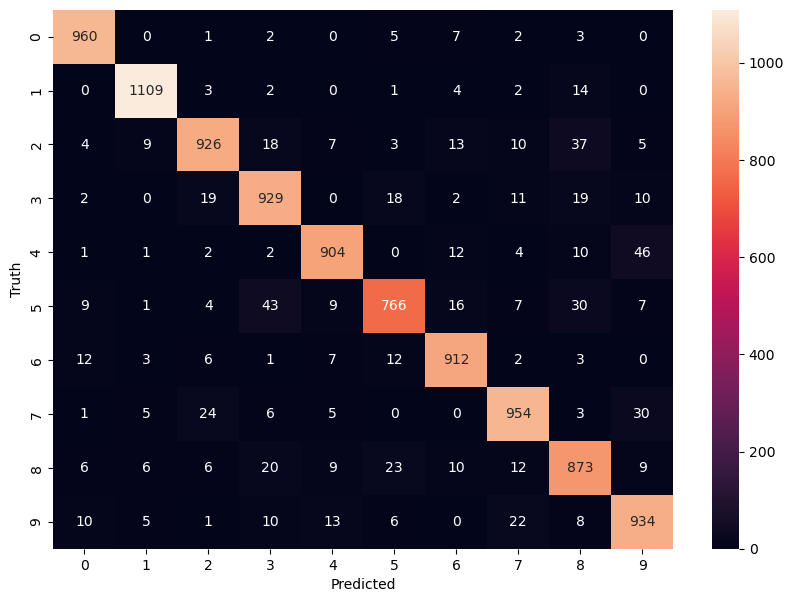

In [70]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [74]:

model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    
    optimizer='adam',
    
    loss='sparse_categorical_crossentropy',
    
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5740 - loss: 1.6871
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8626 - loss: 0.5471
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8912 - loss: 0.4040
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9024 - loss: 0.3528
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9071 - loss: 0.3265
